In [48]:
from docplex.mp.model import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import time
from termcolor import colored


## The BpMMSDP with 6 different delta values on the GKD-d data for Figure 3 in Section 4.2

In [5]:
x1=[588.62, 592.26, 597.27, 600.2, 605.21, 609.85, 614.86, 625.98]
y1=[6160.15, 6245.64, 6265.84, 6293.58, 6313.87, 6333.7, 6353.65, 6359.49]


In [6]:
x2=[461.43, 465.03, 468.84, 472.83, 473.72, 477.31, 481.12, 485.97, 489.56, 493.37, 496.68, 500.49, 505.34, 508.93, 512.74, 528.91, 533.76, 537.35, 541.16, 554.34, 557.93, 565.06, 572.66, 573.72, 577.31, 592.13, 593.51, 599.26, 600.56, 604.24, 606.49, 607.87, 611.51, 612.88, 623.61, 624.99]
y2=[5951.57, 5976.64, 5992.4, 6047.93, 6051.73, 6076.53, 6090.88, 6119.88, 6144.64, 6158.95, 6162.31, 6175.28, 6206.46, 6230.74, 6243.68, 6257.64, 6289.09, 6313.1, 6326.1, 6333.66, 6356.76, 6370.08, 6382.28, 6415.59, 6438.2, 6443.13, 6446.68, 6449.09, 6452.85, 6468.62, 6497.08, 6500.68, 6517.46, 6521.07, 6541.89, 6545.51]


In [7]:
x3=[461.43, 465.03, 468.84, 470.53, 472.83, 473.72, 477.31, 481.12, 482.81, 485.97, 489.56, 493.37, 495.06, 498.87, 505.34, 508.93, 512.74, 523.48, 527.29, 533.76, 537.35, 541.16, 553.87, 555.18, 557.93, 560.62, 562.0, 566.12, 567.5, 573.72, 577.31, 577.94, 580.0, 581.37, 585.07, 586.45, 590.57, 591.95, 593.79, 597.91, 599.29, 604.45, 605.82, 611.79, 613.16, 627.98]
y3=[5951.57, 5976.64, 5992.4, 5996.45, 6047.93, 6051.73, 6076.53, 6090.88, 6095.0, 6119.88, 6144.64, 6158.95, 6163.0, 6177.53, 6206.46, 6230.74, 6243.68, 6248.09, 6262.67, 6289.09, 6313.1, 6326.1, 6338.06, 6341.74, 6356.76, 6387.86, 6391.42, 6406.53, 6410.06, 6415.59, 6438.2, 6440.04, 6461.2, 6464.81, 6473.55, 6477.11, 6492.34, 6495.87, 6497.4, 6512.65, 6516.19, 6545.14, 6548.75, 6564.94, 6568.55, 6573.14]


In [8]:
x4=[455.18, 457.67, 458.16, 460.54, 461.43, 465.03, 468.84, 470.53, 472.83, 473.72, 477.31, 481.12, 482.81, 485.97, 489.56, 493.37, 495.06, 498.87, 505.34, 508.93, 512.74, 523.48, 527.29, 533.76, 537.35, 541.16, 553.87, 555.18, 557.93, 560.62, 562.0, 566.12, 567.5, 573.72, 577.31, 577.94, 580.0, 581.37, 585.07, 586.45, 590.57, 591.95, 593.79, 597.91, 599.29, 601.85, 603.22, 604.45, 605.82, 611.79, 613.16, 617.44, 618.82, 621.22, 622.6, 666.53, 679.24, 684.9, 687.47, 688.68]
y4=[5687.76, 5776.69, 5780.85, 5947.73, 5951.57, 5976.64, 5992.4, 5996.45, 6047.93, 6051.73, 6076.53, 6090.88, 6095.0, 6119.88, 6144.64, 6158.95, 6163.0, 6177.53, 6206.46, 6230.74, 6243.68, 6248.09, 6262.67, 6289.09, 6313.1, 6326.1, 6338.06, 6341.74, 6356.76, 6387.86, 6391.42, 6406.53, 6410.06, 6415.59, 6438.2, 6440.04, 6461.2, 6464.81, 6473.55, 6477.11, 6492.34, 6495.87, 6497.4, 6512.65, 6516.19, 6526.34, 6529.99, 6545.14, 6548.75, 6564.94, 6568.55, 6580.1, 6583.8, 6599.09, 6602.79, 6604.66, 6619.63, 6656.33, 6660.69, 6674.43]


In [9]:
x5=[442.37, 443.7, 445.04, 445.94, 448.74, 449.95, 451.83, 453.08, 457.69, 458.58, 460.54, 461.43, 465.03, 467.32, 468.84, 470.92, 472.83, 473.72, 477.31, 481.12, 482.81, 485.97, 489.56, 493.37, 495.06, 498.87, 505.34, 508.93, 512.74, 523.48, 527.29, 530.55, 532.87, 534.45, 535.93, 538.79, 540.1, 544.29, 545.6, 548.18, 551.04, 552.42, 556.54, 557.92, 568.36, 570.41, 571.79, 576.12, 577.98, 581.62, 583.48, 586.33, 587.73, 589.97, 591.83, 595.49, 597.35, 603.84, 605.7, 621.22, 622.6, 664.31, 672.67, 684.9, 687.47, 688.68]
y5=[5141.83, 5247.38, 5319.85, 5331.57, 5435.72, 5698.81, 5773.97, 5793.7, 5810.67, 5814.85, 5947.73, 5951.57, 5976.64, 5982.53, 5992.4, 6002.81, 6047.93, 6051.73, 6076.53, 6090.88, 6095.0, 6119.88, 6144.64, 6158.95, 6163.0, 6177.53, 6206.46, 6230.74, 6243.68, 6248.09, 6262.67, 6267.87, 6285.42, 6301.52, 6313.53, 6348.85, 6352.58, 6367.6, 6371.3, 6383.63, 6417.37, 6420.95, 6436.01, 6439.56, 6467.73, 6489.67, 6493.3, 6501.48, 6505.06, 6520.24, 6523.79, 6524.96, 6537.71, 6540.16, 6543.72, 6572.02, 6575.65, 6591.44, 6595.07, 6599.09, 6602.79, 6630.29, 6648.81, 6656.33, 6660.69, 6674.43]


In [10]:
x6=[442.37, 443.7, 445.04, 445.94, 448.74, 449.95, 451.83, 453.08, 455.97, 456.86, 460.54, 461.43, 465.02, 468.61, 472.96, 476.42, 477.3, 480.9, 486.39, 489.56, 493.37, 495.06, 496.68, 498.87, 500.27, 505.34, 508.93, 512.74, 522.21, 523.95, 524.65, 528.24, 529.0, 533.74, 535.63, 537.12, 538.79, 539.98, 541.29, 545.48, 546.79, 549.37, 551.04, 552.23, 553.61, 557.73, 559.1, 569.55, 571.6, 572.98, 577.31, 579.17, 582.81, 584.67, 588.92, 591.16, 593.02, 596.68, 598.54, 605.03, 606.89, 624.36, 626.22, 630.48, 632.71, 634.57, 638.23, 640.09, 646.59, 648.45, 661.85, 663.73, 665.59, 669.61, 671.47, 677.96, 679.82, 738.69, 748.78]
y6=[5141.83, 5247.38, 5319.85, 5331.57, 5435.72, 5698.81, 5773.97, 5793.7, 5810.84, 5815.04, 5947.73, 5951.57, 6013.43, 6033.26, 6059.82, 6094.27, 6098.4, 6117.97, 6137.44, 6144.64, 6158.95, 6163.0, 6166.23, 6177.53, 6185.31, 6206.46, 6230.74, 6243.68, 6244.95, 6253.37, 6271.99, 6291.27, 6306.63, 6313.81, 6331.24, 6343.85, 6348.85, 6379.44, 6383.19, 6398.18, 6401.9, 6413.83, 6417.37, 6447.83, 6451.44, 6466.46, 6470.03, 6496.01, 6519.62, 6523.28, 6530.03, 6533.63, 6548.78, 6552.35, 6565.49, 6568.24, 6571.82, 6600.07, 6603.72, 6619.02, 6622.68, 6626.86, 6630.42, 6641.12, 6645.63, 6649.19, 6675.58, 6679.22, 6693.83, 6697.48, 6704.18, 6710.07, 6713.62, 6738.5, 6742.13, 6756.55, 6760.18, 6794.07, 6811.24]


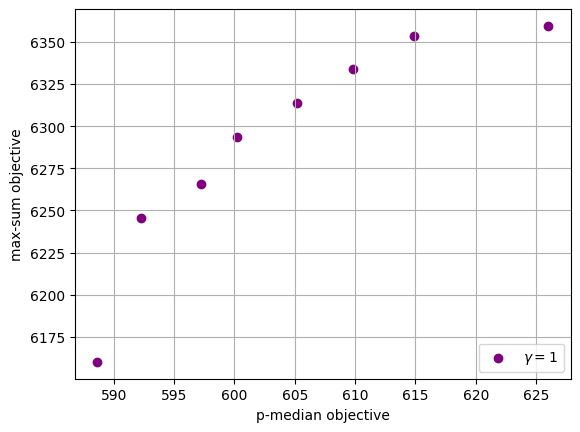

In [11]:
# Create a scatter plot
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')

# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

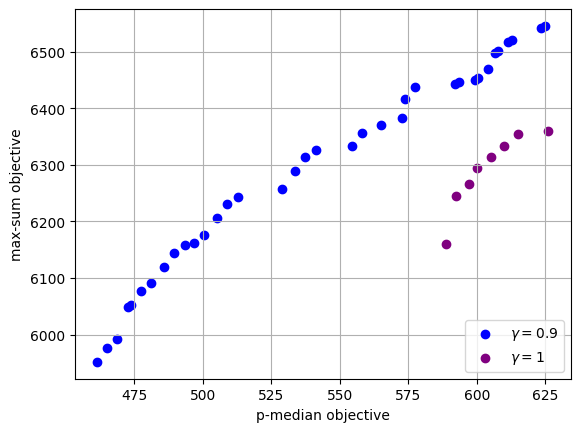

In [12]:
# Create a scatter plot
plt.scatter(x2, y2, color='blue', label='$\gamma = 0.9$')
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')

# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

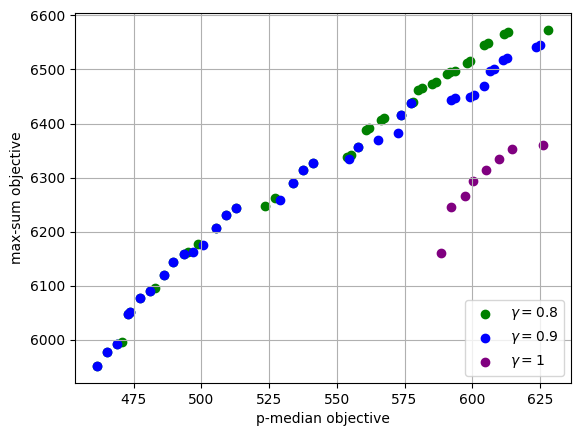

In [13]:
# Create a scatter plot
plt.scatter(x3, y3, color='green', label='$\gamma = 0.8$')
plt.scatter(x2, y2, color='blue', label='$\gamma = 0.9$')
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')

# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

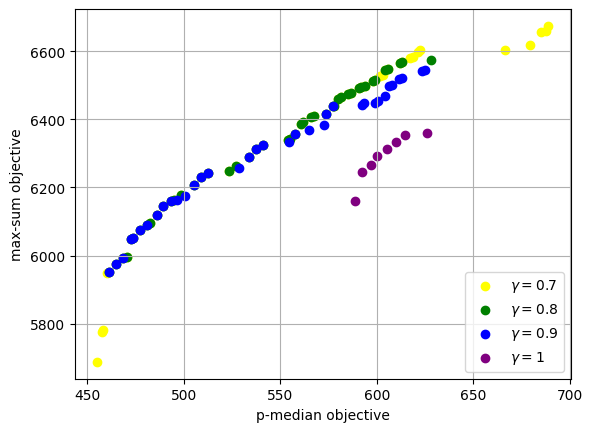

In [14]:
# Create a scatter plot
plt.scatter(x4, y4, color='yellow', label='$\gamma = 0.7$')
plt.scatter(x3, y3, color='green', label='$\gamma = 0.8$')
plt.scatter(x2, y2, color='blue', label='$\gamma = 0.9$')
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')

# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

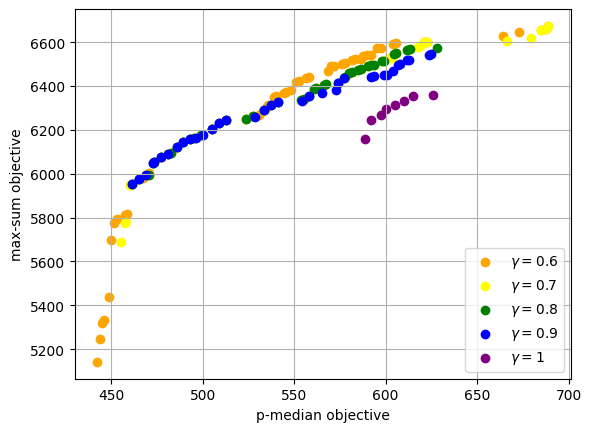

In [15]:
# Create a scatter plot
plt.scatter(x5, y5, color='orange', label='$\gamma = 0.6$')
plt.scatter(x4, y4, color='yellow', label='$\gamma = 0.7$')
plt.scatter(x3, y3, color='green', label='$\gamma = 0.8$')
plt.scatter(x2, y2, color='blue', label='$\gamma = 0.9$')
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')
# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

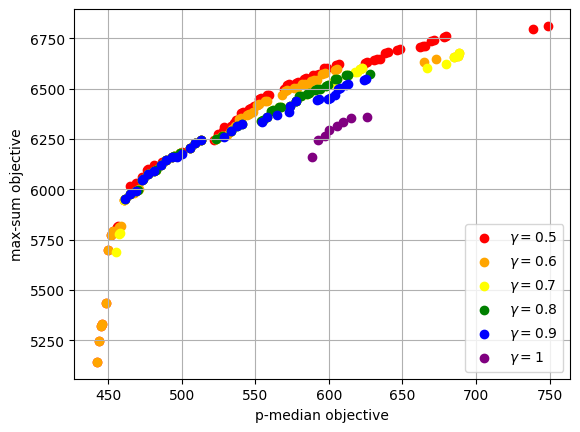

In [16]:
# Create a scatter plot
plt.scatter(x6, y6, color='red', label='$\gamma = 0.5$')
plt.scatter(x5, y5, color='orange', label='$\gamma = 0.6$')
plt.scatter(x4, y4, color='yellow', label='$\gamma = 0.7$')
plt.scatter(x3, y3, color='green', label='$\gamma = 0.8$')
plt.scatter(x2, y2, color='blue', label='$\gamma = 0.9$')
plt.scatter(x1, y1, color='purple', label='$\gamma = 1$')

# Add labels and title
plt.xlabel('p-median objective')
plt.ylabel('max-sum objective')
#plt.title('Scatter Plot of Pareto Frontiers')

# Add grid
plt.grid(True)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

## The comparison with and without delta restrictions in the model for Figure 2 in the paper

In [17]:
# max-sum dispersion problem  
def MS_CAB_bi_level(n,p,q,max_time):
    bqp = Model(name="MAXSUM model",log_output=True)
    #decision variables
    xi = [i for i in range(n)]
    x = bqp.binary_var_dict(keys=xi,name="x")
    
    #constraints
    # p-center
    [bqp.add_constraint(bqp.sum([x[i] for i in range(n)]) == p)] 
    
    #objective                   
    bqp.maximize(bqp.sum([q[i,j]*x[i]*x[j] for i in range(n) for j in range(n)]))
    bqp.parameters.timelimit = max_time

    #solve the problem
    sol = bqp.solve() 

    #print(sol)    #print solution
    bqplb = round(bqp.solve_details.best_bound)
    bqpub = sol.get_objective_value()
    bqpgap = round(100*bqp.solve_details.mip_relative_gap,2)
    bqpruntime = round(bqp.solve_details.time,2)
    
    
    
    center_set=[]                 
    for i in range(n):
        if sol.get_value("x_"+str(i)) != 0:
            center_set.append(i+1)
    
    xr=[]
    for i in range(n):
        xr.append(sol.get_value("x_"+str(i)))
            
    
    return bqpub,bqpgap,bqpruntime,center_set,xr

In [25]:
# objective function for x
def f(x, q):
    x = x.copy()
    return x.dot(q).dot(x)

# gradient f
def df(x, q):
    x = x.copy()
    return x.dot(q)

# Tangent cutting plane method for max-sum problem based on the CAB data, extracting the center set 
def MS_cut_mm_CAB(n,p,q,max_time,mdis):
    num_iter = 0
    runtime = 0
    # get upperbound for theta
    upperbound = sum(q[i,j] for i in range(n) for j in range(n))

    # get starting point
    xr = np.zeros(n)
    xr[:p] = 1

    # setup model
    m = Model(name="MAXSUM cut model")
    
    # set variables
    xi = [i for i in range(n)]
    x = m.binary_var_list(keys=xi,name="x")   
    #x = m.binary_var_list(n, name ="x")


    # set theta
    theta = m.continuous_var(name="theta", ub = upperbound)

    # add constraints
    m.add_constraint(m.sum(x[i] for i in range(n)) == p)
    #xi+xj<=1, when dij<m
    for i in range(n):
        for j in range(i+1,n):  
            if 0 < q[i,j] < mdis:
                m.add_constraint(x[i]+x[j] <= 1)

    # objective function
    m.maximize(theta)
    m.parameters.timelimit = max_time
    
    # get lower bound
    lowerbound = f(xr, q)
    
    while upperbound - lowerbound > 0.1: 
        # get gradient
        dfx = df(xr, q)

        # update the cutting plane
        m.add_constraint(theta <= m.sum(2*dfx[i]*x[i] for i in range(n)) - lowerbound)

        # solve the new model
        m.solve()
        sol = m.solution

        # get new vector
        xr = np.array(sol.get_value_list(x))

        # update lower bound
        lowerbound = f(xr, q)

        # update upper bound
        upperbound = m.objective_value

        # update steps
        num_iter += 1
        
        # update timesolve
        runtime += m.solve_details.time
        
        gap=(upperbound-lowerbound)/upperbound*100
        
        center_set=[]                 
        for i in range(n):
            if sol.get_value("x_"+str(i)) != 0:
                center_set.append(i+1)
        
    return upperbound, gap, runtime, center_set, xr

In [19]:
n = 25
max_time = 3600
epsilon = 1
p=5

In [22]:
from src.data_class import ProblemData
data = pd.read_csv(
    f"data/paper_data/CAB_data_{n}.txt",
    sep=r"\s+",
    header=None,
)
problem_data = ProblemData(data=data)
q = problem_data.distance_matrix

In [23]:
from src.maxmin_diversity.bisection import BisectionMethod

solver = BisectionMethod(ratio=0.3)
_,results = solver.optimise(problem=problem_data, p_median=p)

print(results)
mdis = results["optimal_distance"].iloc[0]

                                    algorithm  p_median  optimal_distance  \
0  Adaptive Bisection Method for P-Dispersion         5          1124.778   

   runtime_seconds  iterations  ratio   status  
0         0.194497           9    0.3  optimal  


In [26]:
mscub_mm, mscgap_mm, mscruntime_mm, msccenter_set_mm, xr = MS_cut_mm_CAB(n,p,q,max_time,mdis)
print(msccenter_set_mm)
print(mscub_mm)
print(xr)


[3, 14, 15, 19, 23]
34420.89600000003
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]


## The comparison between the BpMMSDP in our paper and the BpMDP in 2015 Sayyady paper 

In [27]:
# p-median problem with beta for bi-objective p-median max-min problem (BpMDP) using the method in 2015 Sayyady paper

def pM_beta_maxmin(n,p,q,max_time,beta,min_diff):    
    bqp = Model(name="BQP model")
    #decision variables
    yij = [(i,j) for i in range(n) for j in range(n)]
    xi = [i for i in range(n)]

    y = bqp.binary_var_dict(keys=yij,name="y")
    x = bqp.binary_var_list(keys=xi,name="x") 
    
    #constraints
    # Single assignment
    for j in range(n):
        bqp.add_constraint(bqp.sum([y[i,j] for i in range(n)]) == 1)
        
    # p-center
    [bqp.add_constraint(bqp.sum([x[i] for i in range(n)]) == p)] 
    
    # only assign to center 
    for i in range(n):
        for j in range(n):
            bqp.add_constraint(y[i,j] <= x[i])
            
    #xi+xj<=1, when dij<m
    for i in range(n):
        for j in range(i+1,n): 
            if 0 < q[i,j] < beta:
                bqp.add_constraint(x[i]+x[j] <= 1)
 
    #objective                   
    bqp.minimize(bqp.sum([q[i,j]*y[i,j] for i in range(n) for j in range(n)]))
    bqp.parameters.timelimit = max_time
    
    #solve the problem
    sol = bqp.solve() 
    
    if sol is not None:
        # Solution exists, hence problem is feasible 
        bqplb = bqp.solve_details.best_bound
        bqpub = sol.get_objective_value()
        bqpgap = bqp.solve_details.mip_relative_gap
        bqpruntime = bqp.solve_details.time
        xr = np.array(sol.get_value_list(x))
        
        # newbeta is the new max-min bound
        selected = [i for i in range(n) if xr[i] == 1]
        maxmin = min(q[i, j] for i, j in combinations(selected, 2)) 
        newbeta = maxmin + min_diff
        maxsumval = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
        
        return xr, bqpub, bqpruntime, newbeta, maxmin, maxsumval 
    
    else:
        # Solution does not exist, problem is infeasible
        return "infeasible"
   

In [ ]:
# find Pareto efficient solutions for p median and max-min problem (BpMDP) using the method in 2015 Sayyady paper 

def PM_Pareto_pmedian_maxmin(n,p,q,max_time,epsilon):
    start = time.time()
    num_iter = 0
    runtime = 0
    beta = 1000 # or 0  # this is the intial mindis we can set
    obj = 0
    num_pareto = 0
    num_pareto_pm_mm = 1
    runtime_pm_mm = 0
    obj_min_pm_mm = []
    obj_max_pm_maxmin = []
    obj_max_pm_maxsum = []
    time_list_pm_mm = []
    time_pareto_pm_mm =[]
    
    # Convert the upper triangle of q into a list
    upper_triangle_list = []
    for i in range(len(q)):
        for j in range(i + 1, len(q)):
            upper_triangle_list.append(q[i][j])  

    # Sort the list 
    sort_list = sorted(upper_triangle_list)   

    # Keep only one from same values
    seen = set()
    new_list = []
    for item in sort_list:
        if item not in seen:
            new_list.append(item)
            seen.add(item)

    # Find the min difference in the new list
    min_diff = float('inf')
    for i in range(len(new_list) - 1):
        diff = abs(new_list[i] - new_list[i + 1])
        if diff < min_diff and diff != 0:
            min_diff = diff

    # iterations
    while runtime < max_time: 
        solution = pM_beta_maxmin(n,p,q,max_time,beta,min_diff)
        if solution == "infeasible":
            print(colored('Infeasibility is achieved.','red'))
            return obj_min_pm_mm, obj_max_pm_maxmin, obj_max_pm_maxsum, num_pareto_pm_mm, runtime_pm_mm
        else:     
            x_pm, newobj, pmruntime, newbeta, maxminval, maxsumval = solution
            time_list_pm_mm.append(round(pmruntime,2))
        if newobj >= obj + epsilon: 
            obj_min_pm_mm.append(round(newobj,2))
            obj_max_pm_maxmin.append(round(maxminval,2))
            obj_max_pm_maxsum.append(round(maxsumval,2))
            time_pareto_pm_mm.append(round(pmruntime,2))
            num_pareto += 1 
            num_pareto_pm_mm= num_pareto
            beta=newbeta
            obj=newobj
        if newobj < obj + epsilon:
            obj_min_pm_mm[-1]=round(newobj,2)
            obj_max_pm_maxmin[-1]=round(maxminval,2)
            obj_max_pm_maxsum[-1]=round(maxsumval,2)
            time_pareto_pm_mm[-1]=round(pmruntime,2)
            beta=newbeta

        runtime=time.time()-start
        runtime_pm_mm = runtime          
        num_iter += 1 
        
    return obj_min_pm_mm, obj_max_pm_maxmin, obj_max_pm_maxsum, num_pareto_pm_mm, runtime_pm_mm


In [35]:
# The subproblem in Benders decompostion 
def sub_problem(x,q):    
    # setup model
    sub = Model(name = "sub problem")

    # set continuous variables
    y_key = [(i,k) for i in range(n) 
                   for k in range(n)]
    y = sub.continuous_var_dict(keys=y_key, name="y",lb=0)

    # add constraints
    constraint_list1 = []
    constraint_index1 = []
    for k in range(n):
        constraint_list1.append(sub.add_constraint(sub.sum(y[i,k] for i in range(n)) == 1))
        constraint_index1.append(k)

    constraint_list2 = []
    constraint_index2 = []                           
    for i in range(n):
        for k in range(n):
            constraint_list2.append(sub.add_constraint(y[i,k] <= x[i]))
            constraint_index2.append((i,k))

    # objective function
    sub.minimize(sub.sum(q[i,k]*y[i,k] for i in range(n) for k in range(n)))

    sub.solve()

    solsub = sub.solution   
    sub_obj = sub.objective_value
    
    lambda_val = { constraint_index1[i] : constraint_list1[i].dual_value for i in range(len(constraint_index1))}
    lambda_l=[]
    for k in range(n):
        lambda_l.append(lambda_val[k])
               
    pi_val = { constraint_index2[i] : constraint_list2[i].dual_value for i in range(len(constraint_index2))}
    pi_l = np.zeros((n,n))
    for i in range(n):
        for k in range(n):
            pi_l[i,k] = pi_val[i,k]
                        
    y_ik = np.zeros((n,n)) 
    for i in range(n):
        for k in range(n):
            y_ik[i,k] = solsub.get_value("y_"+str(i)+"_"+str(k))
                
    return lambda_l, pi_l, sub_obj, y_ik
   

In [36]:
# Benders and tangent cutting plane method for the bi-objective p-median and max-sum with max-min 

def PM_Benders(n,p,q,max_time,mdis,epsilon):
    start = time.time()
    num_iter = 0
    runtime = 0
    num_pareto = 0
    num_pareto_pmcbd_mm = 1
    minobj_list_pmcbd_mm=[]
    beta_list_pmcbd_mm =[]
    time_pareto_pmcbd_mm =[]
   
    # Setup the initial p median model
    ms = Model(name="initial-p median model")
   
    #decision variables
    yik = [(i,k) for i in range(n) for k in range(n)]
    xi = [i for i in range(n)]
    y = ms.binary_var_dict(keys=yik,name="y")
    x = ms.binary_var_list(keys=xi,name="x")
    
    #constraints
    # Single assignment
    for k in range(n):
        ms.add_constraint(ms.sum([y[i,k] for i in range(n)]) == 1)
    # p-center
    [ms.add_constraint(ms.sum([x[i] for i in range(n)]) == p)] 
    # only assign to center 
    for i in range(n):
        for k in range(n):
            ms.add_constraint(y[i,k] <= x[i])       
    #xi+xj<=1, when dij<m
    for i in range(n):
        for j in range(i+1,n):  
            if 0 < q[i,j] < mdis:
                ms.add_constraint(x[i]+x[j] <= 1)
                
    #objective                   
    ms.minimize(ms.sum([q[i,k]*y[i,k] for i in range(n) for k in range(n)]))
    ms.parameters.timelimit = max_time
    
    # Solve
    ms.solve()
    solms = ms.solution

    # get new x
    xr = np.array(solms.get_value_list(x))
    beta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
    lb0= ms.objective_value
    runtime0 = ms.solve_details.time
    runtime_pmcbd_mm = runtime0

    minobj_list_pmcbd_mm.append(round(lb0,2))
    beta_list_pmcbd_mm.append(round(beta,2))
    time_pareto_pmcbd_mm.append(round(runtime0,2))
    
    # setup the initial master model
    m = Model(name = "master problem")
    
    #decision variables
    xi = [i for i in range(n)]
    thetak= [k for k in range(n)]
    x = m.binary_var_list(keys=xi,name="x")
    theta = m.continuous_var_dict(keys=thetak, name="theta", lb = 0)
    
    # add constraints
    m.add_constraint(m.sum(x[i] for i in range(n)) == p)
    #xi+xj<=1, when dij<m
    for i in range(n):
        for j in range(i+1,n):  
            if 0 < q[i,j] < mdis:
                m.add_constraint(x[i]+x[j] <= 1)
                
    # objective function
    m.minimize(m.sum(theta[k] for k in range(n)))

    while runtime < max_time:   
        UB=100000000
        LB=-10000000       
        start1=time.time()

        while UB - LB >= 0.01:
            newbeta=0
            while newbeta < beta + epsilon:      
                # update gradient
                dfx = df(xr, q) 
                # update the cutting plane
                m.add_constraint(m.sum(2*dfx[i] * x[i] for i in range(n)) - f(xr, q) >= beta + epsilon)
                # solve the new model
                m.parameters.timelimit = max_time
                m.solve()
                solm = m.solution
                runtime = time.time() - start
                runtime_pmcbd_mm = runtime
                                
                if solm is None:
                    print(colored('Infeasibility of Benders is achieved.','red'))                    
                    return minobj_list_pmcbd_mm, beta_list_pmcbd_mm, num_pareto_pmcbd_mm, runtime_pmcbd_mm  
                else:
                    # get new x
                    xr = np.array(solm.get_value_list(x))
                    newbeta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
                    lowerbound = m.objective_value

            # Generate dual values and upperbound
            lambda_l, pi_l, upperbound, y_ik = sub_problem(xr,q)
            
            # Update the bounds
            LB = max(LB,lowerbound) 
            UB = min(UB,upperbound)

            # add the optimality cut to the model
            for k in range(n):
                m.add_constraint(theta[k] >= lambda_l[k] + m.sum(pi_l[i,k]*x[i] for i in range(n)))

        # look for the next Pareto optimal solution
        runtime_iter= time.time() - start1    
        if lowerbound >= lb0 + epsilon: 
            minobj_list_pmcbd_mm.append(round(lowerbound,2))
            beta_list_pmcbd_mm.append(round(newbeta,2))
            time_pareto_pmcbd_mm.append(round(runtime_iter,2))
            num_pareto += 1 
            num_pareto_pmcbd_mm = num_pareto+1
            beta=newbeta
            lb0=lowerbound        
        if lowerbound < lb0 + epsilon:
            minobj_list_pmcbd_mm[-1]=round(lowerbound,2)
            beta_list_pmcbd_mm[-1]=round(newbeta,2)
            time_pareto_pmcbd_mm[-1]=round(runtime_iter,2)
            beta=newbeta    

        num_iter +=1
    
    return minobj_list_pmcbd_mm, beta_list_pmcbd_mm, num_pareto_pmcbd_mm, runtime_pmcbd_mm


In [30]:
solution_Pareto = PM_Pareto_pmedian_maxmin(n,p,q,max_time,epsilon)
obj_min_pm_mm, obj_max_pm_maxmin, obj_max_pm_maxsum, num_pareto_pm_mm, runtime_pm_mm = solution_Pareto

Infeasibility is achieved.


In [42]:
# For the BpMDP problem, the initial beta = 1000, i.e. only consider min distance is at least 1000.
solution_Pareto = PM_Pareto_pmedian_maxmin(n,p,q,max_time,epsilon)
obj_min_pm_mm, obj_max_pm_maxmin, obj_max_pm_maxsum, num_pareto_pm_mm, runtime_pm_mm = solution_Pareto
print(obj_min_pm_mm)
print(obj_max_pm_maxmin)
print(obj_max_pm_maxsum)
print(num_pareto_pm_mm)
print(runtime_pm_mm)

Infeasibility is achieved.
[7613.85, 7738.47, 7976.31, 9648.56]
[1008.2, 1021.61, 1048.54, 1124.78]
[31425.65, 32305.03, 32750.61, 33135.51]
4
0.33226871490478516


In [43]:
# For the bi-objective p-median max-sum diversity problem (BpMMSDP), mdis=1000
mdis=1000 
minobj_list_pmcbd, beta_list_pmcbd, num_pareto_pmcbd, runtime_pmcbd = PM_Benders(n,p,q,max_time,mdis,epsilon)
print(minobj_list_pmcbd)
print(beta_list_pmcbd)
print(num_pareto_pmcbd)
print(runtime_pmcbd)

Infeasibility of Benders is achieved.
[7613.85, 7738.47, 7976.31, 8285.03, 10221.1]
[31425.65, 32305.03, 32750.61, 33976.5, 34420.9]
5
0.9882984161376953


## This is for extracting specific location for visulisation purpose

In [44]:
#mdis=1000 for CAB  designed for extracting location number
max_time=10
num_iter = 0
max_iter = 1000
runtime = 0
obj = 0
num_pareto = 0
num_pareto_pmcbd_mm = 1
minobj_list_pmcbd_mm=[]
beta_list_pmcbd_mm =[]
time_list_pmcbd_mm=[]
time_pareto_pmcbd_mm =[]
x_list = []

start = time.time()
# Setup model
ms = Model(name="initial-p median model")
#decision variables
yik = [(i,k) for i in range(n) for k in range(n)]
xi = [i for i in range(n)]
y = ms.binary_var_dict(keys=yik,name="y")
x = ms.binary_var_list(keys=xi,name="x")
#constraints
# Single assignment
for k in range(n):
    ms.add_constraint(ms.sum([y[i,k] for i in range(n)]) == 1)
# p-center
[ms.add_constraint(ms.sum([x[i] for i in range(n)]) == p)] 
# only assign to center 
for i in range(n):
    for k in range(n):
        ms.add_constraint(y[i,k] <= x[i])       
#xi+xj<=1, when dij<m
for i in range(n):
    for j in range(i+1,n):  
        if 0 < q[i,j] < mdis:
            ms.add_constraint(x[i]+x[j] <= 1)
#objective                   
ms.minimize(ms.sum([q[i,k]*y[i,k] for i in range(n) for k in range(n)]))
ms.parameters.timelimit = max_time
# Solve
ms.solve()
solms = ms.solution

# get new x
xr = np.array(solms.get_value_list(x))
beta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
lb0= ms.objective_value
runtime0 = ms.solve_details.time
runtime_pmcbd_mm = runtime0
print(xr)

minobj_list_pmcbd_mm.append(round(lb0,2))
beta_list_pmcbd_mm.append(round(beta,2))
time_pareto_pmcbd_mm.append(round(runtime0,2))

center_set=[]                 
for i in range(n):
    if xr[i]!=0:
        center_set.append(i+1)
x_list.append(center_set)
print(center_set)


# setup model
m = Model(name = "master problem")
#decision variables
xi = [i for i in range(n)]
thetak= [k for k in range(n)]
x = m.binary_var_list(keys=xi,name="x")
theta = m.continuous_var_dict(keys=thetak, name="theta", lb = 0)
# add constraints
m.add_constraint(m.sum(x[i] for i in range(n)) == p)
#xi+xj<=1, when dij<m
for i in range(n):
    for j in range(i+1,n): 
        if 0 < q[i,j] < mdis:
            m.add_constraint(x[i]+x[j] <= 1)
# objective function
m.minimize(m.sum(theta[k] for k in range(n)))

while runtime < max_time:   
    UB=100000000
    LB=-10000000       
    start1=time.time()

    while UB - LB >= 0.01:
        newbeta=0
        while newbeta < beta + epsilon:        
            # update gradient
            dfx = df(xr, q) 
            # update the cutting plane
            m.add_constraint(m.sum(2*dfx[i] * x[i] for i in range(n)) - f(xr, q) >= beta + epsilon)
            # solve the new model
            m.parameters.timelimit = max_time
            m.solve()
            solm = m.solution
            #print(solm)

            if solm is None:
                print(colored('Infeasibility of Benders is achieved.','red'))
                break
                #return minobj_list_pmcbd_mm, beta_list_pmcbd_mm, num_pareto_pmcbd_mm, runtime_pmcbd_mm  
            else:
                # get new x
                xr = np.array(solm.get_value_list(x))
                newbeta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
                lowerbound = m.objective_value


        LB = max(LB,lowerbound)  
        lambda_l, pi_l, upperbound, y_ik = sub_problem(xr,q)     
        UB = min(UB,upperbound)

        # add the optimality cut to the model
        for k in range(n):
            m.add_constraint(theta[k] >= lambda_l[k] + m.sum(pi_l[i,k]*x[i] for i in range(n)))

    # look for the next Pareto optimal solution
    runtime_iter= time.time() - start1 
    runtime=time.time() - start
    runtime_pmcbd_mm=runtime   
    center_set=[]                 
    for i in range(n):
        if xr[i]!=0:
            center_set.append(i+1)

    print(xr)
    print(center_set)

    if lowerbound >= lb0 + epsilon: 
        minobj_list_pmcbd_mm.append(round(lowerbound,2))
        beta_list_pmcbd_mm.append(round(newbeta,2))
        time_pareto_pmcbd_mm.append(round(runtime_iter,2))
        print(minobj_list_pmcbd_mm)
        print(beta_list_pmcbd_mm)
        print(time_pareto_pmcbd_mm)
        x_list.append(center_set)
        num_pareto += 1 
        num_pareto_pmcbd_mm= num_pareto+1
        beta=newbeta
        lb0=lowerbound 
    if lowerbound < lb0 + epsilon:
        minobj_list_pmcbd_mm[-1]=round(lowerbound,2)
        beta_list_pmcbd_mm[-1]=round(newbeta,2)
        time_pareto_pmcbd_mm[-1]=round(runtime_iter,2)
        beta=newbeta    

    num_iter +=1
    num_iter_pmcbd_mm=num_iter +1




[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0.]
[11, 17, 19, 23, 24]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0.]
[11, 14, 18, 19, 23]
[7613.85, 7738.47]
[31425.65, 32305.03]
[0.05, 1.12]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0.]
[11, 14, 17, 19, 23]
[7613.85, 7738.47, 7976.31]
[31425.65, 32305.03, 32750.61]
[0.05, 1.12, 0.57]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0.]
[3, 14, 19, 21, 23]
[7613.85, 7738.47, 7976.31, 8285.03]
[31425.65, 32305.03, 32750.61, 33976.5]
[0.05, 1.12, 0.57, 0.42]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
[7613.85, 7738.47, 7976.31, 8285.03, 10221.1]
[31425.65, 32305.03, 32750.61, 33976.5, 34420.9]
[0.05, 1.12, 0.57, 0.42, 0.19]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibilit

In [35]:
# test bi-objective p-median max-sum model and also extract max-min value
# mdis = the optimal maxmin value (1124) for CAB   designed for extracting location number
mdis=1124
max_time=10
num_iter = 0
max_iter = 1000
runtime = 0
obj = 0
num_pareto = 0
num_pareto_pmcbd_mm = 1
minobj_list_pmcbd_mm=[]
beta_list_pmcbd_mm =[]
maxmin_list_pmcbd_mm =[]
time_list_pmcbd_mm=[]
time_pareto_pmcbd_mm =[]
x_list = []

start = time.time()
# Setup model
ms = Model(name="initial-p median model")#,log_output=True)
#decision variables
yik = [(i,k) for i in range(n) for k in range(n)]
xi = [i for i in range(n)]
y = ms.binary_var_dict(keys=yik,name="y")
x = ms.binary_var_list(keys=xi,name="x")
#constraints
# Single assignment
for k in range(n):
    ms.add_constraint(ms.sum([y[i,k] for i in range(n)]) == 1)
# p-center
[ms.add_constraint(ms.sum([x[i] for i in range(n)]) == p)] 
# only assign to center 
for i in range(n):
    for k in range(n):
        ms.add_constraint(y[i,k] <= x[i])       
#xi+xj<=1, when dij<=m
for i in range(n):
    for j in range(i+1,n):  #set(range(n))|set([i]):
        if 0 < q[i,j] < mdis:
            ms.add_constraint(x[i]+x[j] <= 1)
#objective                   
ms.minimize(ms.sum([q[i,k]*y[i,k] for i in range(n) for k in range(n)]))
ms.parameters.timelimit = max_time
# Solve
ms.solve()
solms = ms.solution
#print(solms)

# get new x
xr = np.array(solms.get_value_list(x))
beta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
lb0= ms.objective_value
runtime0 = ms.solve_details.time
runtime_pmcbd_mm = runtime0
print(xr)

selected = [i for i in range(n) if xr[i] == 1]
maxmin = min(q[i, j] for i, j in combinations(selected, 2))
maxmin_list_pmcbd_mm.append(round(maxmin,2))

minobj_list_pmcbd_mm.append(round(lb0,2))
beta_list_pmcbd_mm.append(round(beta,2))
time_pareto_pmcbd_mm.append(round(runtime0,2))

center_set=[]                 
for i in range(n):
    if xr[i]!=0:
        center_set.append(i+1)
#x_list.append(solms.get_value_list(x))
x_list.append(center_set)
print(center_set)


# setup model
m = Model(name = "master problem")
#decision variables
xi = [i for i in range(n)]
thetak= [k for k in range(n)]
x = m.binary_var_list(keys=xi,name="x")
theta = m.continuous_var_dict(keys=thetak, name="theta", lb = 0)
# add constraints
m.add_constraint(m.sum(x[i] for i in range(n)) == p)
#xi+xj<=1, when dij<m
for i in range(n):
    for j in range(i+1,n): 
        if 0 < q[i,j] < mdis:
            m.add_constraint(x[i]+x[j] <= 1)
# objective function
m.minimize(m.sum(theta[k] for k in range(n)))

while runtime < max_time:   
    UB=100000000
    LB=-10000000       
    start1=time.time()

    while UB - LB >= 0.01:
        newbeta=0
        while newbeta < beta + epsilon:       
            # update gradient
            dfx = df(xr, q) 
            # update the cutting plane
            m.add_constraint(m.sum(2*dfx[i] * x[i] for i in range(n)) - f(xr, q) >= beta + epsilon)
            # solve the new model
            m.parameters.timelimit = max_time
            m.solve()
            solm = m.solution
            #print(solm)

            if solm is None:
                print(colored('Infeasibility of Benders is achieved.','red'))
                break
                #return minobj_list_pmcbd_mm, beta_list_pmcbd_mm, num_pareto_pmcbd_mm, runtime_pmcbd_mm  
            else:
                # get new x
                xr = np.array(solm.get_value_list(x))
                newbeta = sum(q[i,j]*xr[i]*xr[j] for i in range(n) for j in range(n))
                lowerbound = m.objective_value
                
                selected = [i for i in range(n) if xr[i] == 1]
                maxmin = min(q[i, j] for i, j in combinations(selected, 2))



        LB = max(LB,lowerbound)   
        lambda_l, pi_l, upperbound, y_ik = sub_problem(xr,q)     
        UB = min(UB,upperbound)

        # add the optimality cut to the model
        for k in range(n):
            m.add_constraint(theta[k] >= lambda_l[k] + m.sum(pi_l[i,k]*x[i] for i in range(n)))

    # look for the next Pareto optimal solution
    runtime_iter= time.time() - start1 
    runtime=time.time() - start
    runtime_pmcbd_mm=runtime   
    center_set=[]                 
    for i in range(n):
        if xr[i]!=0:
            center_set.append(i+1)

    print(xr)
    print(center_set)

    if lowerbound >= lb0 + epsilon: 
        minobj_list_pmcbd_mm.append(round(lowerbound,2))
        beta_list_pmcbd_mm.append(round(newbeta,2))
        time_pareto_pmcbd_mm.append(round(runtime_iter,2))
        maxmin_list_pmcbd_mm.append(round(maxmin,2))
        print(minobj_list_pmcbd_mm)
        print(maxmin_list_pmcbd_mm)
        print(beta_list_pmcbd_mm)
        print(time_pareto_pmcbd_mm)
        x_list.append(center_set)
        num_pareto += 1 
        num_pareto_pmcbd_mm= num_pareto+1
        beta=newbeta
        lb0=lowerbound 
    if lowerbound < lb0 + epsilon:
        minobj_list_pmcbd_mm[-1]=round(lowerbound,2)
        beta_list_pmcbd_mm[-1]=round(newbeta,2)
        time_pareto_pmcbd_mm[-1]=round(runtime_iter,2)
        beta=newbeta    

    num_iter +=1
    num_iter_pmcbd_mm=num_iter +1



[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0.]
[3, 15, 19, 23, 24]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
[9648.56, 10221.1]
[1124.78, 1124.78]
[33135.51, 34420.9]
[0.03, 0.1]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]
[3, 14, 15, 19, 23]
Infeasibility of Benders is achieved.
[0. 0. 1. 0. 0. 

KeyboardInterrupt: 

In [45]:
# For the BpMDP problem, the initial beta = 1000, i.e. only consider min distance is at least 1000.
x3=[7613.85, 7738.47, 7976.31, 9648.56]
y3=[31425.65, 32305.03, 32750.61, 33135.51]

In [46]:
# For the bi-objective p-median max-sum diversity problem (BpMMSDP), mdis = 1000
x=[7613.85,7738.47,7976.31,8285.03,10221.1]
y=[31425.65,32305.03,32750.61,33976.5,34420.9]


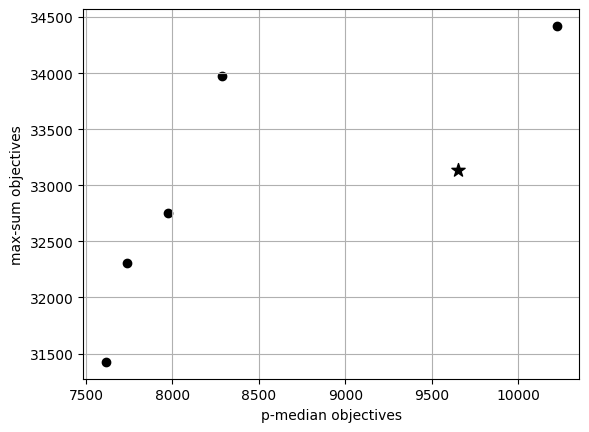

In [47]:
# Create a scatter plot based on the CAB data (n=25, p=5)
plt.scatter(x, y, color='black')

x_star = 9648.56
y_star = 33135.51
plt.scatter(x_star, y_star, color='black', marker='*',s=100)

# Add labels and title
plt.xlabel('p-median objectives')
plt.ylabel('max-sum objectives')

# Add grid
plt.grid(True)

# # Add legend
# plt.legend()

# Show the plot
plt.show()